Lo siguiente está basado en los libros:

* B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009

* G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)


**Nota:**

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

In [2]:
library(ggplot2)

In [3]:
options(repr.plot.width=2.5, repr.plot.height=2.5) #esta línea sólo se ejecuta para jupyterlab con R

# Motivación

En el análisis estadístico de datos de poblaciones aparecen ciertas distribuciones con mucha frecuencia. En lo que continúa se estudiarán tres de las más comunes: la distribución uniforme (discreta y continua), que representa datos equiprobables, la distribución binomial y la distribución normal, que están íntimamente relacionadas y podemos pensar a la segunda (normal) como la versión continua de la primera (binomial). Ésta última es muy importante en la práctica y en la teoría.

Si $X$ es una variable aleatoria con función de distribución -o densidad en el caso continuo- $f$, entonces decimos que los datos representados por los valores que toma $X$ tienen una distribución dada por $f$.

## Caso discreto

En el caso discreto, en el cual $X$ toma valores $x_1,x_2,\dots,x_n$ (soporte de $X$, $S_X$), éstos representan datos con media: $$\mu = E(X) = \displaystyle \sum_{i=1}^nx_if(x_i)$$

en donde, recordemos que $f(x_i) = P(X = x_i)$ es la probabilidad de que $X$ tome el valor $X_i$. Asimismo, la varianza está dada por: $$\sigma^2=E((X-\mu)^2) = \sum_{i=1}^n(x_i-\mu)^2f(x_i)$$

que es el valor esperado de las desviaciones -al cuadrado- alrededor de la media. Decimos que la distribución $f$ tiene media $\mu$ y varianza $\sigma^2$. Claramente la desviación estándar es simplemente $\sigma = \sqrt{\sigma^2}$.

**Obs:**

* La varianza puede ser calculada con la fórmula: $\sigma^2 = E(X^2)-(E(X))^2$.

## Caso continuo

En el caso continuo, en el cual $X$ toma valores en un intervalo de la forma $[a,b]$ o $(a,b)$ (soporte de $X$, $S_X$) o uniones de estos intervalos, éstos representan datos con media: $$\mu=E(X)=\displaystyle \int_{X \in S}xf(x)dx.$$

si $\displaystyle \int_{X \in S}|x|f(x)dx < \infty$ (es finita).

Asimismo, la varianza está dada por: $$\sigma^2=E((X-\mu)^2) = \int_{X \in S}(x-\mu)^2f(x)dx,$$

y la desviación estándar es: $\sigma = \sqrt{\sigma^2}$.

# Uniforme

Cuando los datos de un conjunto **ocurren, cada uno con la misma frecuencia**, decimos que están uniformemente distribuidos. Éste es el caso de la distribución de probabilidad determinada por una **variable aleatoria sobre un espacio muestral de datos equiprobables**. Por ejemplo, los que resultan de lanzar una moneda, lanzar un dado, girar una ruleta o bien, elegir un número al azar en el intervalo $[0, 1]$. La distribución que resulta, ya sea en el caso discreto o continuo, se conoce como distribución uniforme.

En el caso discreto, dada una variable aleatoria $X$ que toma valores $\{1, 2, \dots , n\}$, cada uno con probabilidad $\frac{1}{n}$ , la distribución de probabilidad queda dada por: $$f(i) = \frac{1}{n} \forall i=1,2,\dots,n.$$

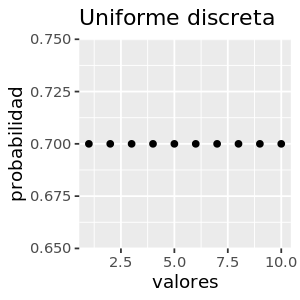

In [4]:
n=10
valores<-1:n
probabilidad<-.7
qplot(valores,probabilidad,main='Uniforme discreta') #qplot es quick plot

**Propiedades:**

* $\mu = \displaystyle \sum_{i=1}^ni\frac{1}{n} = \frac{n+1}{2}$.

* $\sigma = \sqrt{\displaystyle \sum_{i=1}^n(i-\mu)^2\frac{1}{n}} = \sqrt{\frac{n^2-1}{12}}$.

Para el caso continuo, considérese el caso de elegir un número al azar en el intervalo $[a,b]$ de la recta numérica. Sea $X$ la variable aleatoria asociada que toma cada uno de los valores del intervalo. La densidad de probabilidad correspondiente debe ser tal que el área bajo la gráfica sea la unidad y dados números $c$ y $d$ en el intervalo $[a, b]$, con $c < d$, la probabilidad: $$P(c < X < d) = \frac{d-c}{b-a}$$ es el área por debajo de la gráfica entre $c$ y $d$. 

Podemos definir esta función de densidad como: $$f(x) = \begin{cases}
\frac{1}{n} & \text{si } a \leq x \leq b,\\
0 & \text{en otro caso}
\end{cases}$$

La media y varianza están dadas por: $$\mu=\frac{a+b}{2},$$

$$\sigma^2=\frac{(b-a)^2}{12}.$$

## Su gráfica

In [5]:
set.seed(2000)
n=500
a=-2;b=3
valores<-runif(n,a,b)
probabilidad<-1/(b-a)
gf<-ggplot(data.frame(valores=valores,probabilidad=probabilidad))

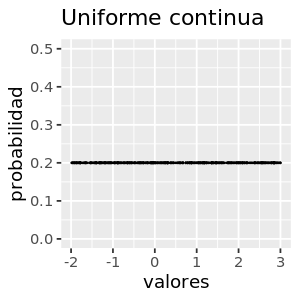

In [6]:
gf + geom_point(aes(x=valores,y=probabilidad),size=.1) + ylim(0, 1/(b-a)+.3)+
ggtitle('Uniforme continua')

El área debajo de la curva es: $$(b-a)\frac{1}{b-a} = 1.$$

Y la probabilidad de que $X$ esté entre $0$ y $2$ es el área formada en el rectángulo:

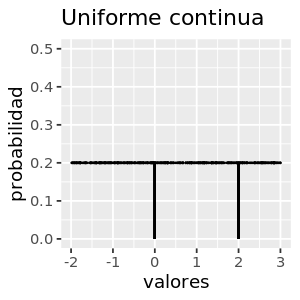

In [7]:
gf + geom_point(aes(x=valores,y=probabilidad),size=.1) + ylim(0, 1/(b-a)+.3) +
geom_segment(aes(x = 0, y = 0, xend = 0, yend = 1/(b-a))) +
geom_segment(aes(x = 2, y = 0, xend = 2, yend = 1/(b-a))) +
ggtitle('Uniforme continua')

## Ejemplos

1) Sea $X$ la variable aleatoria uniforme que representa el resultado observado al lanzar un dado. La probabilidad de obtener al menos un $3$ es de: $$P(X\geq 3) = \displaystyle \sum_{i=1}^4\frac{1}{6}=\frac{4}{6}=\frac{2}{3}.$$

El lanzamiento medio es de: $$\mu = \displaystyle \sum_{i=1}^6 i\frac{1}{6} = \frac{1+6}{2} = \frac{7}{2} $$

con desviación estándar:

$$\sigma = \sqrt{\frac{(6-1)^2}{12}} \approx 1.4.$$

2) Sea $X$ el tiempo de espera (en minutos) en un consultorio dental y supongamos que éste sigue una distribución uniforme descrita por la función de densidad, $$f(x) = \begin{cases}
\frac{1}{90} & \text{si } 0 \leq x \leq 90,\\
0 & \text{en otro caso}
\end{cases}$$

La probabilidad de que un paciente espere entre $15$ y $45$ minutos está dada por: $$P(15 < X < 45) = \frac{45-15}{90-0} = \frac{1}{3}.$$

El tiempo medio de espera es de: $$\mu = \frac{0+90}{2} = 45 \text{ minutos}$$

con desviación estándar: $$\sigma = \sqrt{\frac{(90-0)^2}{12}} \approx 26 \text{ minutos}.$$

# Binomial

La distribución binomial se basa en ensayos *Bernoulli* por ejemplo:

* Se lanza un dado 10 veces, ¿cuál es la probabilidad de obtener 4 seises?

* Un nuevo medicamento para la diabetes mantiene el nivel de glucosa en la sangre del paciente, muy cercano a los niveles normales. Desgraciadamente, el $10\%$ de los pacientes que reciben este medicamento desarrolla hipertensión arterial. Un médico tiene $5$ pacientes diabéticos -sin relación alguna entre ellos- y desea saber la probabilidad de que todos ellos desarrollen hipertensión arterial si son tratados con el medicamento.

Estas dos situaciones describen ejemplos de lo que se conoce como un **experimento binomial**: un experimento binomial consiste de $n$ **etapas o ensayos idénticos e independientes, llamados ensayos** *Bernoullli*, tales que:

* En cada ensayo o etapa hay **dos posibles resultados**: éxito y fracaso (podríamos llamarlos positivo y negativo, o $1$ y $0$).

* La **probabilidad de éxito** en cada ensayo es de $p$ y la de fracaso de $1-p$.

La variable aleatoria discreta $X$ que asociamos a este experimento es el número de éxitos en los $n$ ensayos. En las situaciones descritas tenemos que,

* $X$ cuenta el número de seises en $10$ lanzamientos de un dado.

* $X$ cuenta el número de pacientes, del grupo de $5$ pacientes, que desarrollan hipertensión arterial.

Pensemos ahora en lanzar un dado $n$ veces. Queremos calcular la probabilidad de que salgan -exactamente- $k$ cuatros en estos $n$ lanzamientos.

* El espacio de resultados o espacio muestral $S$ lo podemos representar como un conjunto de $n$ elementos: $\{l_1,l_2,\dots,l_n\}$ con cada $l_i$ lanzamiento $i$, por lo que se tienen $6^n$ posibilidades.

* Si queremos que salgan $k$ cuatros, éstos pueden aparecer distribuidos de diferentes formas en los $n$ lanzamientos. Como no nos interesa el orden existen $\binom{n}{k}$ formas posibles de realizar esto. Por ejemplo, si $k = 2$ y $n = 4$ los dos cuatros pueden aparecer en los siguientes subconjuntos de lanzamientos: $\{l_1, l_2\}, \{l_1, l_3\}, \{l_1, l_4\}, \{l_2, l_3\}, \{l_2, l_4\} y \{l_3, l_4\}$.

* Una vez elegidos los cuatros, en los otros lanzamientos pueden aparecer cualquiera de los $5$ números restantes, por lo que tenemos $5^{n-k}$ posibilidades. En resúmen, hay $\binom{n}{k}5^{n-k}$ diferentes formas de obtener $k$ cuatros en $n$ lanzamientos de un dado.

* Si $E=${obtener $k$ cuatros en $n$ lanzamientos} entonces: $$P(E) = \frac{\binom{n}{k}5^{n-k}}{6^n} = \binom{n}{k}\frac{1}{6}^k\frac{5^{n-k}}{6^{n-k}}=\binom{n}{k}\left(\frac{1}{6}\right)^k\left(\frac{5}{6}\right)^{n-k},$$ y la última igualdad es básicamente: $\binom{n}{k}P(\{\text{obtener cuatro}\})P(\{\text{no obtener cuatro}\})$.

* Se interpreta el evento: “obtener un cuatro”, como el éxito y a “no obtener un cuatro” como el fracaso, Los lanzamientos son los ensayos del experimento binomial.

En resúmen: sea $X$ la variable aleatoria asociada a un experimento binomial y $p$ la probabilidad de éxito, entonces, $$P(X=k) = \binom{n}{k}P(\text{{éxito}})^{k}P(\text{{fracaso}})^{n-k}=\binom{n}{k}p^k(1-p)^{n-k}$$

# Normal

# Ejercicios

1) Supóngase que el tiempo (en minutos) que una persona espera el Metrobús los días de semana sigue una distribución uniforme dada por, $$f(x) = \begin{cases}
\frac{1}{12} & \text{si } 0 \leq x \leq 12,\\
0 & \text{en otro caso}
\end{cases}$$

a) ¿Cuál es la probabilidad que una persona espere menos de $6$ minutos?.

b) ¿Su tiempo medio de espera? ¿su desviación estándar?.